In [31]:
#WEEK 4 PRACTICUM
#Didi Chang-Park
#For this week's practicum, you'll be asked to do the same type of work we were doing in class yesterday,
#but now on your own texts, counting your own words and in order to answer your own research questions.
#Specifically, please count how often at least three different words appear
#in at least three of your own texts. Then, write a few sentences
# about what you think the results you reached might mean.
#Careful not to over-interpret the findings: in fact,
#please also include a sentence or two about what you can't
#quite yet conclude from the data.

#Example research questions might include:
#How often do certain character names appear in one of your texts vs. two others (like we did yesterday)?
#How often are male/female/nonbinary characters mentioned?
#Which of your texts most often mentions a few keywords ("culture"? "map"? "border"?). And so on.

#Lastly, a note of caution: are your texts of different lengths?
#Make sure to divide your count of a word in a text by the total number of words in that text!


with open('../corpora/gertrude/objects.txt') as file1:
    objects_str = file1.read()
    
with open('../corpora/gertrude/food.txt') as file2:
    food_str = file2.read()
    
with open('../corpora/gertrude/rooms.txt') as file3:
    rooms_str = file3.read()
 
import nltk
objects_tokens = nltk.word_tokenize(objects_str.lower())
food_tokens = nltk.word_tokenize(food_str.lower())
rooms_tokens = nltk.word_tokenize(rooms_str.lower())

objects_nltk = nltk.Text(objects_tokens)
food_nltk = nltk.Text(food_tokens)
rooms_nltk = nltk.Text(rooms_tokens)

I'm going to look at colors first, and then adverbs which end in '-ing' and '-ly'.

In [142]:
#print('CONCORDANCE ORANGE IN FOOD')
#food_nltk.concordance('color')
#print('\nCONCORDANCE COLOR IN ROOMS')
#rooms_nltk.concordance('color')

colors_list = ['color','red', 'orange', 'yellow', 'green',
                           'blue','purple','pink','brown','white','grey','black']

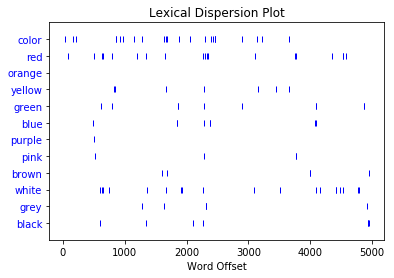

In [35]:
objects_nltk.dispersion_plot(colors_list)

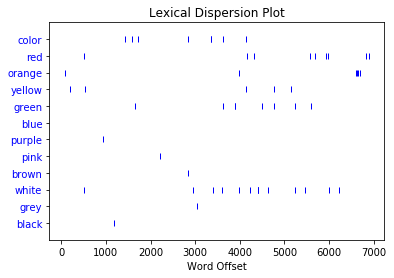

In [37]:
food_nltk.dispersion_plot(colors_list)

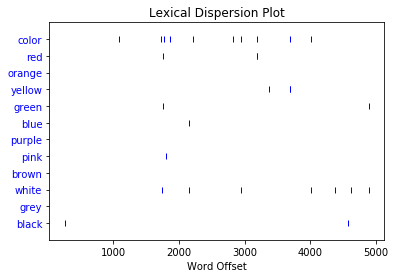

In [28]:
rooms_nltk.dispersion_plot(colors_list)

Hmm... Not too much to see here by way of patterns. But there is a lot of white across the texts. A lot of red in objects.

In [78]:
#On to the adverbs!
#-ing adverbs
ing_noise = {'nothing','morning','thing','ring','being','string'}
objects_ing = [w for w in objects_nltk if w[-3:]=='ing']
food_ing = [w for w in food_nltk if w[-3:]=='ing']
rooms_ing = [w for w in rooms_nltk if w[-3:]=='ing']
food_ing_set=set(food_ing).difference(ing_noise)
objects_ing_set=set(objects_ing).difference(ing_noise)
rooms_ing_set=set(rooms_ing).difference(ing_noise)

#-ly adverbs
ly_noise = {'jelly'}
objects_ly = [w for w in objects_nltk if w[-2:]=='ly']
food_ly = [w for w in food_nltk if w[-2:]=='ly']
rooms_ly = [w for w in rooms_nltk if w[-2:]=='ly']
food_ly_set=set(food_ly).difference(ly_noise)
objects_ly_set=set(objects_ly).difference(ly_noise)
rooms_ly_set=set(rooms_ly).difference(ly_noise)

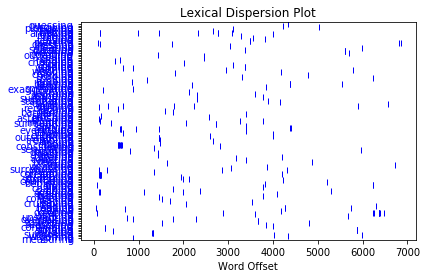

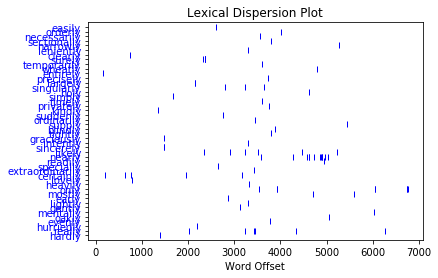

In [124]:
food_ly_list = list(food_ly_set)
food_ing_list = list(food_ing_set)
objects_ly_list = list(objects_ly_set)
objects_ing_list = list(objects_ing_set)
rooms_ly_list = list(rooms_ly_set)
rooms_ing_list = list(rooms_ing_set)


all_ly = food_ly_set.union(objects_ly_set).union(rooms_ly_set)
all_ing = food_ing_set.union(objects_ing_set).union(rooms_ing_set)

food_nltk.dispersion_plot(food_ing_list)
food_nltk.dispersion_plot(food_ly_list)

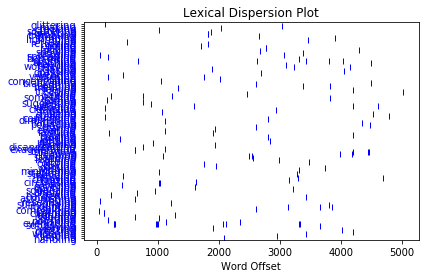

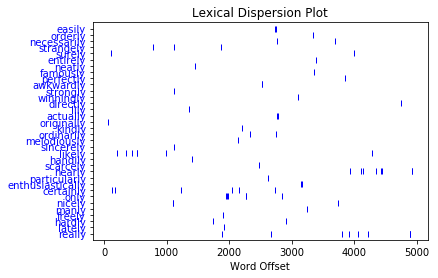

In [82]:
objects_nltk.dispersion_plot(objects_ing_list)
objects_nltk.dispersion_plot(objects_ly_list)


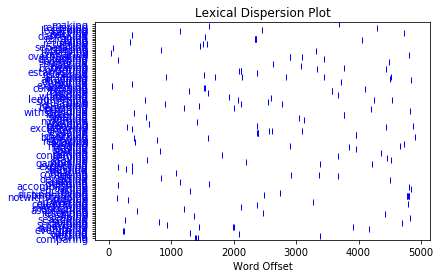

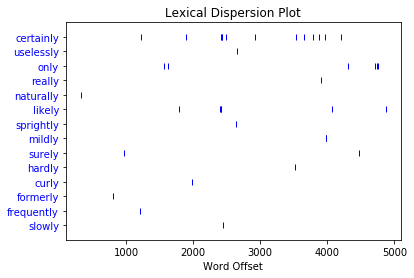

In [83]:
rooms_nltk.dispersion_plot(rooms_ing_list)
rooms_nltk.dispersion_plot(rooms_ly_list)

Again, really hard to see patterns of interest here, especially with all the data. I'm going to just look at the more frequent adverbs next...

In [139]:
#words which appear in two or more of the -ly or -ing sets
#ended up not using this in preference of the set which contains the union of all adverbs
intersect_ly = rooms_ly_set.intersection(food_ly_set).union(food_ly_set.intersection(objects_ly_set)).union(objects_ly_set.intersection(rooms_ly_set))
intersect_ing = rooms_ing_set.intersection(food_ing_set).union(food_ing_set.intersection(objects_ing_set)).union(objects_ing_set.intersection(rooms_ing_set))
print(intersect_ly)
print(intersect_ing)

{'easily', 'orderly', 'necessarily', 'sincerely', 'likely', 'surely', 'entirely', 'nearly', 'certainly', 'only', 'kindly', 'hardly', 'ordinarily', 'really'}
{'making', 'evening', 'bidding', 'giving', 'trembling', 'rubbing', 'hanging', 'saving', 'lying', 'returning', 'fitting', 'leading', 'separating', 'cooking', 'exaggerating', 'leaning', 'looking', 'standing', 'coloring', 'showing', 'learning', 'seeing', 'suffering', 'spreading', 'eating', 'counting', 'borrowing', 'winning', 'mending', 'anything', 'cutting', 'dressing', 'covering', 'washing', 'squeezing', 'meaning', 'gliding', 'astonishing', 'feeling', 'sleeping', 'something', 'singing', 'surrounding', 'mounting', 'changing', 'beginning', 'shining', 'dividing', 'calling', 'cunning', 'wedding', 'supposing', 'everything', 'charming', 'wetting', 'having', 'lining', 'widening', 'pleasing'}


In [140]:
#dispersion plots if wanted... for now they are not terribly meaningful
#rooms_nltk.dispersion_plot(list(intersect_ly))
#rooms_nltk.dispersion_plot(list(intersect_ing))
#objects_nltk.dispersion_plot(list(intersect_ly))
#objects_nltk.dispersion_plot(list(intersect_ing))
#food_nltk.dispersion_plot(list(intersect_ly))
#food_nltk.dispersion_plot(list(intersect_ing))

In [143]:
#making frequency distribution for adverbs...
def make_dist(tokens, wordlist, res, ratio_on):
    dist = {}
    for word in wordlist:
        c = tokens.count(word)
        r = c/len(tokens)
        if(ratio_on):
            if(r>=res):
                dist[word] = r
        else:
            if(c>=res):
                dist[word] = c
    return dist


In [148]:
advs_union = list(all_ly.union(all_ing))

objects_dist = make_dist(objects_tokens, advs_union, 4, False)
print('OBJECTS: '+str(objects_dist)+"\n")

food_dist = make_dist(food_tokens, advs_union, 4, False)
print('FOOD: '+str(food_dist)+"\n")

keywords=list(intersect_ly.union(intersect_ing))
rooms_dist = make_dist(rooms_tokens, advs_union, 4, False)
print('ROOMS: '+str(rooms_dist)+"\n")


#this has the counts by percentage, but the results aren't
#terribly different from the counts by number, so I'm
#commenting it out for now.

#objects_dist = make_dist(objects_tokens, advs_union, .001, True)
#print('OBJECTS: '+str(objects_dist)+"\n")

#food_dist = make_dist(food_tokens, advs_union, .001, True)
#print('FOOD: '+str(food_dist)+"\n")

#rooms_dist = make_dist(rooms_tokens, advs_union, .001, True)
#print('ROOMS: '+str(rooms_dist)+"\n")'''


OBJECTS: {'only': 6, 'likely': 7, 'really': 9, 'anything': 5, 'certainly': 6, 'nearly': 8, 'supposing': 10}

FOOD: {'only': 8, 'hanging': 4, 'likely': 6, 'really': 6, 'feeling': 7, 'evening': 4, 'sticking': 4, 'anything': 8, 'cutting': 5, 'certainly': 5, 'everything': 5, 'considering': 8, 'meaning': 4, 'surely': 5, 'cooking': 4, 'eating': 10, 'nearly': 12}

ROOMS: {'only': 6, 'giving': 4, 'likely': 6, 'something': 4, 'notwithstanding': 5, 'anything': 6, 'certainly': 13, 'lying': 4, 'supposing': 4}



<b>REFLECTIONS</b>

It's hard to conclude anything from these particular adverbs in their counted form alone, so I'll use these sets to look at particular instances of the frequent adverbs in each text, in a non-comprehensive, exploratory fashion.

Food certainly has more adverbs than objects or rooms. Some of these words seem more clearly related to food: sticking, cutting, cooking, and eating. The most frequent words overall are nearly (12), eating (10), only (8), anything (8), considering (8).

"Nearly" is used in a rather unfamiliar way, especially in "CUPS":

>A cup is neglected by being full of size. It shows no shade, in come little wood cuts and blessing and <b>nearly</b> not that not with a wild bought in, not at all so polite, not nearly so behind. 
>
>Cups crane in. They need a pet oyster, they need it so hoary and <b>nearly</b> choice. The best slam is utter. <b>Nearly</b> be freeze. 
>
>Why is a cup a stir and a behave. Why is it so seen. 
>
>A cup is readily shaded, it has in between no sense that is to say music, memory, musical memory. 
>
>Peanuts blame, a half sand is holey and <b>nearly</b>. 

Certainly an interesting word to think about in relation to this text.

Rooms has quite a few (13) instances of "certainly." Do rooms perhaps have more of a stability than food and objects? Here's one paragraph in which "certainly" appears multiple times:

> Almost very likely there is no seduction, almost very likely there is no stream, <b>certainly</b> very likely the height is penetrated, <b>certainly certainly</b> the target is cleaned. Come to sit, come to refuse, come to surround, come slowly and age is not lessening. The time which showed that was when there was no eclipse. All the time that resenting was removal all that time there was breadth. No breath is shadowed, no breath is painstaking and yet <b>certainly</b> what could be the use of paper, paper shows no disorder, it shows no desertion.

Like "nearly," "certainly" has a defamiliarizing effect, it's certainly one of the more important words in Gertrude Stein's poetic toolbox. Might serve as a keyword across the three chapters of Tender Buttons -- though "certainly" isn't one of the most frequent adverbs in "Objects," it's still interesting to read the instances of its appearance in this chapter:

> A SELTZER BOTTLE. 
>
>Any neglect of many particles to a cracking, any neglect of this makes around it what is lead in color and <b>certainly</b> discolor in silver. The use of this is manifold. Supposing a certain time selected is assured, suppose it is even necessary, suppose no other extract is permitted and no more handling is needed, suppose the rest of the message is mixed with a very long slender needle and even if it could be any black border, supposing all this altogether made a dress and suppose it was actual, suppose the mean way to state it was occasional, if you suppose this in August and even more melodiously, if you suppose this even in the necessary incident of there <b>certainly</b> being no middle in summer and winter, suppose this and an elegant settlement a very elegant settlement is more than of consequence, it is not final and sufficient and substituted. This which was so kindly a present was constant.

The use of "certainly" seems far more natural in this instance. Not as defamiliarizing as in "Rooms."

Objects has quite a few instances of "supposing" (10), "nearly," (8), and "really" (9).
Supposing and its analogue suppose (not counted above) is quite prominent in this paragraph as well; certainly gives a discursive, searching air to the description of the bottle. It tends to appear in clusters elsewhere:

> A cushion has that cover. <b>Supposing</b> you do not like to change, <b>supposing</b> it is very clean that there is no change in appearance, <b>supposing</b> that there is regularity and a costume is that any the worse than an oyster and an exchange. Come to season that is there any extreme use in feather and cotton. Is there not much more joy in a table and more chairs and very likely roundness and a place to put them. (A SUBSTANCE IN A CUSHION)

> <b>Supposing</b> a single piece is a hair <b>supposing</b> more of them are orderly, does that show that strength, does that show that joint, does that show that balloon famously. Does it. (CARELESS WATER)

And "really" appears all over the place, fairly inconspicuously. It only appears close together in an instance of repetition:

> Please a plate, put a match to the seam and <b>really</b> then <b>really</b> then, <b>really</b> then it is a remark that joins many many lead games. It is a sister and sister and a flower and a flower and a dog and a colored sky a sky colored grey and nearly that nearly that let. (BOOK)

I could go on... and will go on with these investigations.
Hard to know how to switch between the close reading and the data, it seems like the data points me towards particular words to close-read, but the data itself is not particularly easy to analyze or find interesting patterns in. I can't conclude which words are most interesting or relevant to look at based on frequency, "really" is clearly less interesting than "nearly" despite being a frequent adverb. But using the data as pointers to close-reading may lead me to find better sets of words and better kinds of data to visualize in the end.